# Testing logit model assumptions

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [4]:
df = pd.read_csv('cleaned2.csv')

In [5]:
X = df[['valence',
        'backing_dancers',
        'eng_lan',
       'Pop', 'Traditional', 'Dance', 'Ballad']]

y = df['is_final']

X = sm.add_constant(X)
best_of_the_best_model = sm.Logit(y, X)
best_of_the_best_model = best_of_the_best_model.fit()

print(best_of_the_best_model.summary())

Optimization terminated successfully.
         Current function value: 0.658672
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               is_final   No. Observations:                  483
Model:                          Logit   Df Residuals:                      475
Method:                           MLE   Df Model:                            7
Date:                Wed, 01 May 2024   Pseudo R-squ.:                 0.03285
Time:                        14:12:37   Log-Likelihood:                -318.14
converged:                       True   LL-Null:                       -328.94
Covariance Type:            nonrobust   LLR p-value:                  0.002965
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4018      0.401      1.001      0.317      -0.385       1.188
valence       

### Multicolinearity

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


          Variable        VIF
0            const  18.437449
1          valence   1.047653
2  backing_dancers   1.075260
3          eng_lan   1.126395
4              Pop   3.423326
5      Traditional   1.865725
6            Dance   2.017941
7           Ballad   2.892626


Our values are pretty small, so we have no perfect collinearity.

### Homoskedasticity

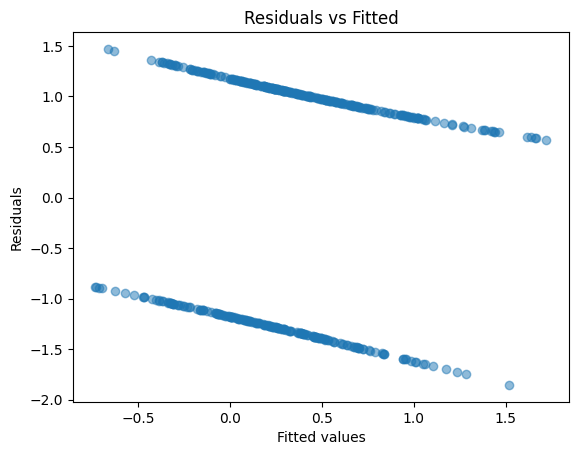

Breusch-Pagan test p-value: 0.006889921404764821


In [8]:
import statsmodels.stats.api as sms

plt.scatter(best_of_the_best_model.fittedvalues, best_of_the_best_model.resid_dev, alpha=0.5)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

_, p_bp, _, _ = sms.het_breuschpagan(best_of_the_best_model.resid_dev, X)
print("Breusch-Pagan test p-value:", p_bp)


### Independence of errors

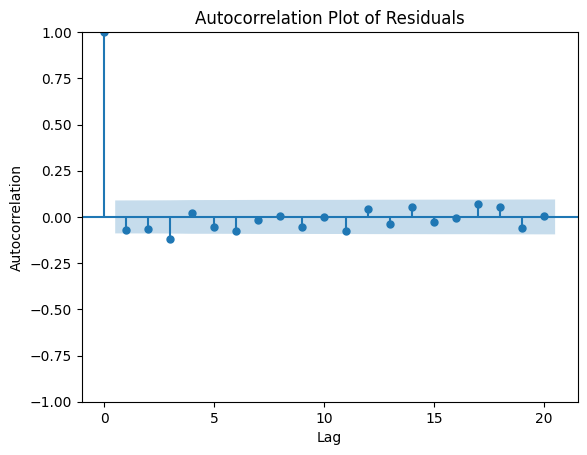

Durbin-Watson statistic: 2.1365820164979237


In [9]:
import statsmodels.graphics.tsaplots as splt
splt.plot_acf(best_of_the_best_model.resid_dev, lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot of Residuals')
plt.show()

from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(best_of_the_best_model.resid_dev)
print("Durbin-Watson statistic:", dw_statistic)
